In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Read Data 

In [22]:
df=pd.read_excel('/kaggle/input/glass-imbalanced/glass (Imbalanced).xlsx')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.00,140066.00,73282.00,0.69,804468.00,0.00,0.12,negative
1,15176423,129777.00,353812.00,121127.00,73002.00,0.65,852888.00,0.00,0.00,negative
2,152212996,1420795.00,382099.00,0.47,71.77,0.11,95726.00,0.00,0.00,negative
3,152222108,1321045.00,37716.00,0.79,719884.00,0.13,102452.00,0.00,0.00,negative
4,151755118,13.39,365935.00,11888.00,727892.00,0.57,827064.00,0.00,0.06,negative
...,...,...,...,...,...,...,...,...,...,...
209,151727782,1470005.00,0.00,234119.00,73282.00,0.00,894852.00,0.66,0.00,positive
210,151622994,1414145.00,0.00,288047.00,72.61,0.08,918524.00,106155.00,0.00,positive
211,151837126,14321.00,325974.00,221921.00,712492.00,145935.00,578508.00,162855.00,0.00,positive
212,151657164,147998.00,0.00,19913.00,731084.00,0.00,82814.00,171045.00,0.00,positive


In [23]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00,214.00
mean,122766456.90,741766.92,247726.33,117974.54,538941.92,4724.69,714205.75,5748.96,0.04
std,56499718.57,616572.27,153736.24,73791.11,305738.56,29122.84,363906.17,28114.62,0.09
min,151115.00,10.73,0.00,0.29,69.81,0.00,5.43,0.00,0.00
25%,151559210.00,132703.00,36818.00,48908.00,73282.00,0.12,714622.00,0.00,0.00
50%,151733477.00,1175410.00,343485.00,131078.00,724644.00,0.56,843204.00,0.00,0.00
75%,151850224.50,1323705.00,357853.00,157079.00,729908.00,0.61,898349.00,0.00,0.06
max,153124196.00,1579065.00,397814.00,304097.00,751804.00,270135.00,1496336.00,171045.00,0.51


# Null Value 

In [24]:
# get sum of null values in each column
df.isnull().sum()

RI       0
 Na      0
 Mg      0
 Al      0
 Si      0
 K       0
 Ca      0
 Ba      0
 Fe      0
Class    0
dtype: int64

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    int64  
 1    Na     214 non-null    float64
 2    Mg     214 non-null    float64
 3    Al     214 non-null    float64
 4    Si     214 non-null    float64
 5    K      214 non-null    float64
 6    Ca     214 non-null    float64
 7    Ba     214 non-null    float64
 8    Fe     214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(8), int64(1), object(1)
memory usage: 16.8+ KB


# Get duplicated rows

In [26]:
# get duplicated rows
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
46,152212996,1420795.00,382099.00,0.47,71.77,0.11,95726.00,0.00,0.00,negative


# delete duplicated

In [27]:
# delete duplicated if exists
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,151588824,1287795.00,343036.00,140066.00,73282.00,0.69,804468.00,0.00,0.12,negative
1,15176423,129777.00,353812.00,121127.00,73002.00,0.65,852888.00,0.00,0.00,negative
2,152212996,1420795.00,382099.00,0.47,71.77,0.11,95726.00,0.00,0.00,negative
3,152222108,1321045.00,37716.00,0.79,719884.00,0.13,102452.00,0.00,0.00,negative
4,151755118,13.39,365935.00,11888.00,727892.00,0.57,827064.00,0.00,0.06,negative
...,...,...,...,...,...,...,...,...,...,...
209,151727782,1470005.00,0.00,234119.00,73282.00,0.00,894852.00,0.66,0.00,positive
210,151622994,1414145.00,0.00,288047.00,72.61,0.08,918524.00,106155.00,0.00,positive
211,151837126,14321.00,325974.00,221921.00,712492.00,145935.00,578508.00,162855.00,0.00,positive
212,151657164,147998.00,0.00,19913.00,731084.00,0.00,82814.00,171045.00,0.00,positive


# KNN Model 

In [28]:

# KNN Model 





#  LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

#   (Target) & (Features)
X = df.drop('Class', axis=1)  # all columns ixcludet the target 
y = df['Class']  # Target 

# x , y Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bulid KNN Model 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# y_pred
y_pred = knn.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 86.05%


In [29]:
## choose best k
# Define the range of k values to test
k_values = range(3, 50)
test_accuracies = []
# Train the k-NN classifier with different values of k and evaluate onthe test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train) # Train the model
    y_pred = knn.predict(X_test) # Predict on the test set
    accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
    test_accuracies.append(accuracy)
# Determine the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 3


# Decision Tree 

In [30]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Bulid Decision Tree Model 
model = DecisionTreeClassifier()
model.fit(X_train,y_train)




DecisionTreeClassifier()

In [31]:
# y_pred
y_pred = model.predict(X_test)
# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 90.70%


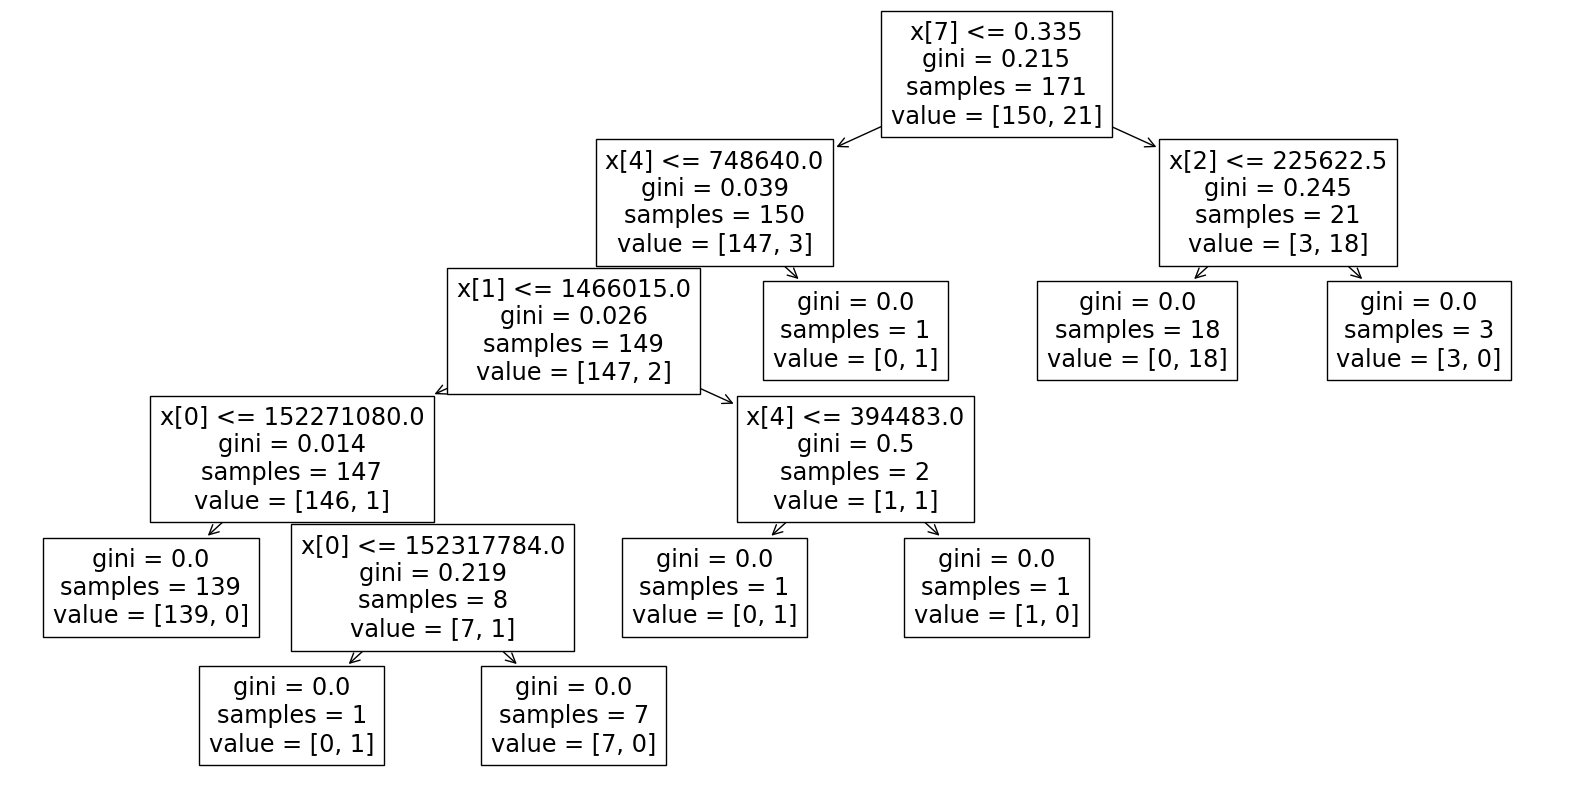

In [32]:
# plot tree
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
tree.plot_tree(model)
plt.show()

# Random Forest 

In [33]:
from sklearn.ensemble import RandomForestClassifier
# Bulid Decision Tree Model 
model = RandomForestClassifier(criterion='entropy',n_estimators=27)
model.fit(X_train,y_train)

# y_pred
y_pred = model.predict(X_test)

# accuracy 
accuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 95.35%


# lazypredict

In [34]:
! pip install lazypredict

In [35]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 26.45it/s]

[LightGBM] [Info] Number of positive: 21, number of negative: 150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 360
[LightGBM] [Info] Number of data points in the train set: 171, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.122807 -> initscore=-1.966113
[LightGBM] [Info] Start training from score -1.966113
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Bulid  AdaBoost
model = AdaBoostClassifier(n_estimators=50)  
model.fit(X_train, y_train)

#  X_test
y_pred = model.predict(X_test)
# accuracy
ةaccuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')


Data accuracy: 95.35%


 # Min Max Scaller

In [37]:
from sklearn.preprocessing import MinMaxScaler 
# Make scalling for all df 
scaler = MinMaxScaler()  
scaled = scaler.fit_transform(df.values)     
print(scaled)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
print(scaled_df)



[[0.98996312 0.81554149 0.86230248 ... 0.         0.24       0.        ]
 [0.09822191 0.08217974 0.88939052 ... 0.         0.         0.        ]
 [0.9940434  0.89976912 0.96049661 ... 0.         0.         0.        ]
 ...
 [0.9915863  0.00906256 0.81941309 ... 0.95211786 0.         1.        ]
 [0.99040987 0.09371893 0.         ... 1.         0.         1.        ]
 [0.99090129 0.94693659 0.         ... 0.09060773 0.         1.        ]]
      RI   Na   Mg   Al   Si    K   Ca   Ba   Fe  Class
0   0.99 0.82 0.86 0.46 0.10 0.00 0.54 0.00 0.24   0.00
1   0.10 0.08 0.89 0.40 0.10 0.00 0.57 0.00 0.00   0.00
2   0.99 0.90 0.96 0.00 0.00 0.00 0.06 0.00 0.00   0.00
3   0.99 0.84 0.09 0.00 0.96 0.00 0.07 0.00 0.00   0.00
4   0.99 0.00 0.92 0.04 0.97 0.00 0.55 0.00 0.11   0.00
..   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...
209 0.99 0.93 0.00 0.77 0.10 0.00 0.60 0.00 0.00   1.00
210 0.99 0.90 0.00 0.95 0.00 0.00 0.61 0.62 0.00   1.00
211 0.99 0.01 0.82 0.73 0.95 0.54 0.39 0.95 0.00   1

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

# Bulid  AdaBoost
model = AdaBoostClassifier(n_estimators=50)  
model.fit(X_train, y_train)

#  X_test
y_pred = model.predict(X_test)
# accuracy
ةaccuracy = accuracy_score(y_test, y_pred)
print(f'Data accuracy: {accuracy * 100:.2f}%')

Data accuracy: 95.35%
